<a href="https://colab.research.google.com/github/LongDaNga/CSx101-A1-2021-03/blob/main/penguins_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn 


In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
penguins_df = sns.load_dataset('penguins')

In [4]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
penguins_df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

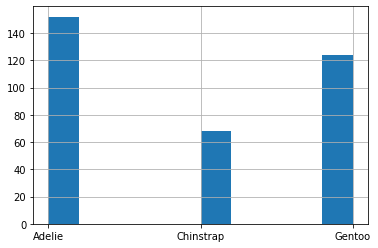

In [10]:
y = penguins_df["species"]
y.hist()

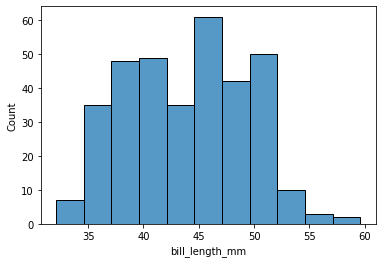

In [11]:
sns.histplot(data=penguins_df["bill_length_mm"])

In [12]:
palettes={'Male':'green','Female':'blue'}


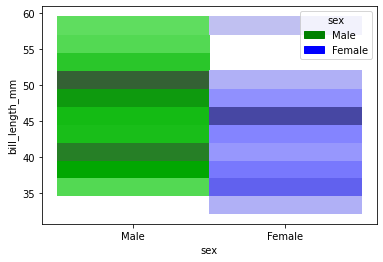

In [13]:
sns.histplot(data=penguins_df,x="sex",y="bill_length_mm",hue="sex",palette=palettes)

In [14]:
penguins_df.columns =['species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']


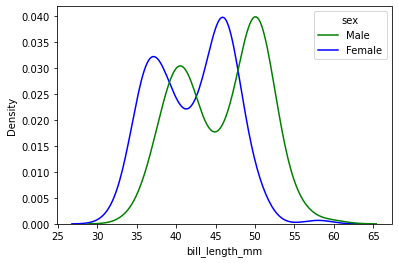

In [15]:

sns.kdeplot(data=penguins_df,x="bill_length_mm",hue="sex",palette=palettes)

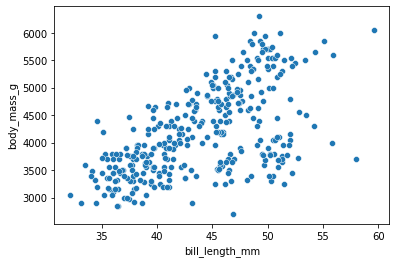

In [16]:
sns.scatterplot(data=penguins_df,x="bill_length_mm",y="body_mass_g")

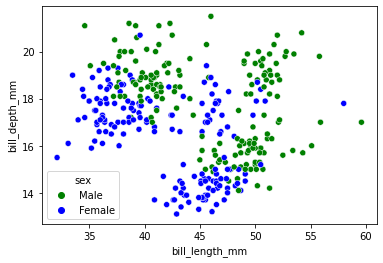

In [17]:
sns.scatterplot(data=penguins_df,x="bill_length_mm",y="bill_depth_mm",hue="sex",palette=palettes)

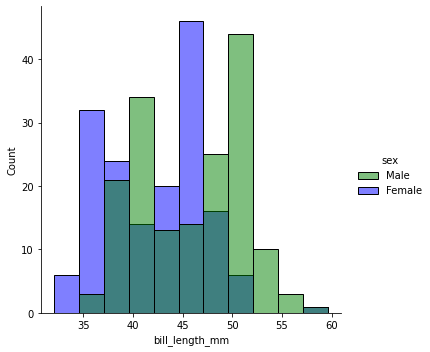

In [18]:

sns.displot(data=penguins_df,x="bill_length_mm",hue="sex",palette=palettes)

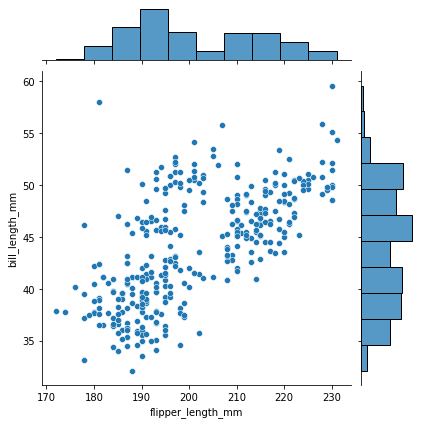

In [19]:
sns.jointplot(data=penguins_df,x="flipper_length_mm",y="bill_length_mm")

In [20]:
sns.set_theme()

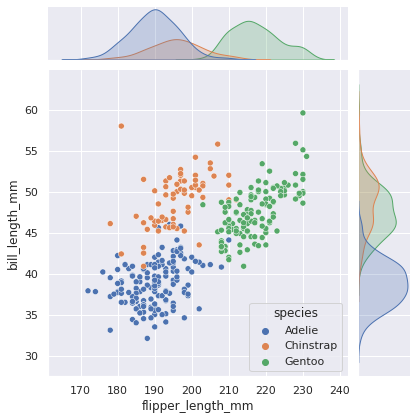

In [21]:
sns.jointplot(data=penguins_df,x="flipper_length_mm",y="bill_length_mm",hue="species")
 

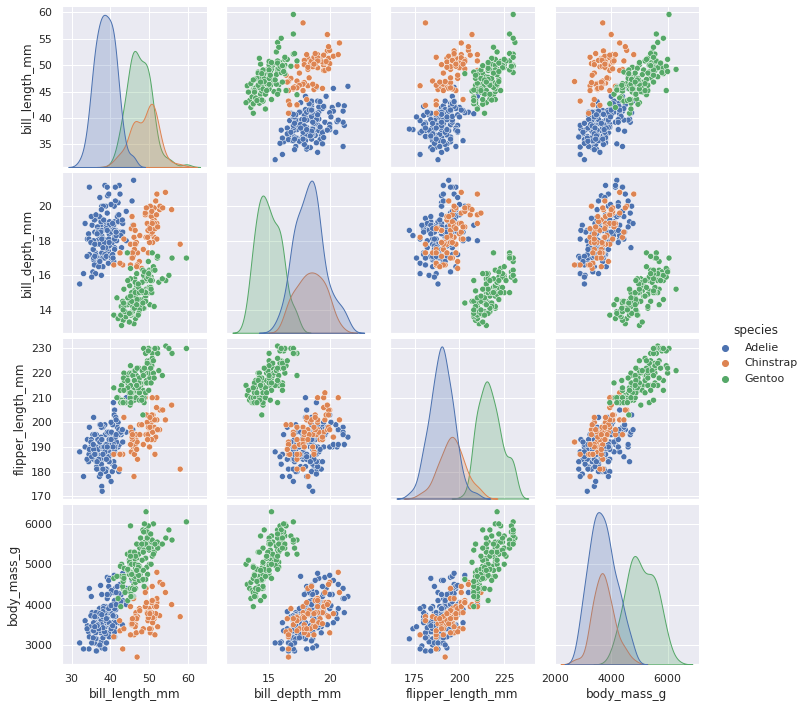

In [22]:
sns.pairplot(data=penguins_df,hue="species")

In [31]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
penguins_df.iloc[:,:] = imputer.fit_transform(penguins_df)

In [41]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [51]:
penguins_matrix_design = penguins_df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].values
X=penguins_matrix_design

In [52]:
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [53]:
# species - target
y = lb.fit_transform(penguins_df['species'])

In [54]:
feature =["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
target = ["Adelie", "Chinstrap", "Gentoo"]

In [56]:
model =DecisionTreeClassifier(random_state=42)
model.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

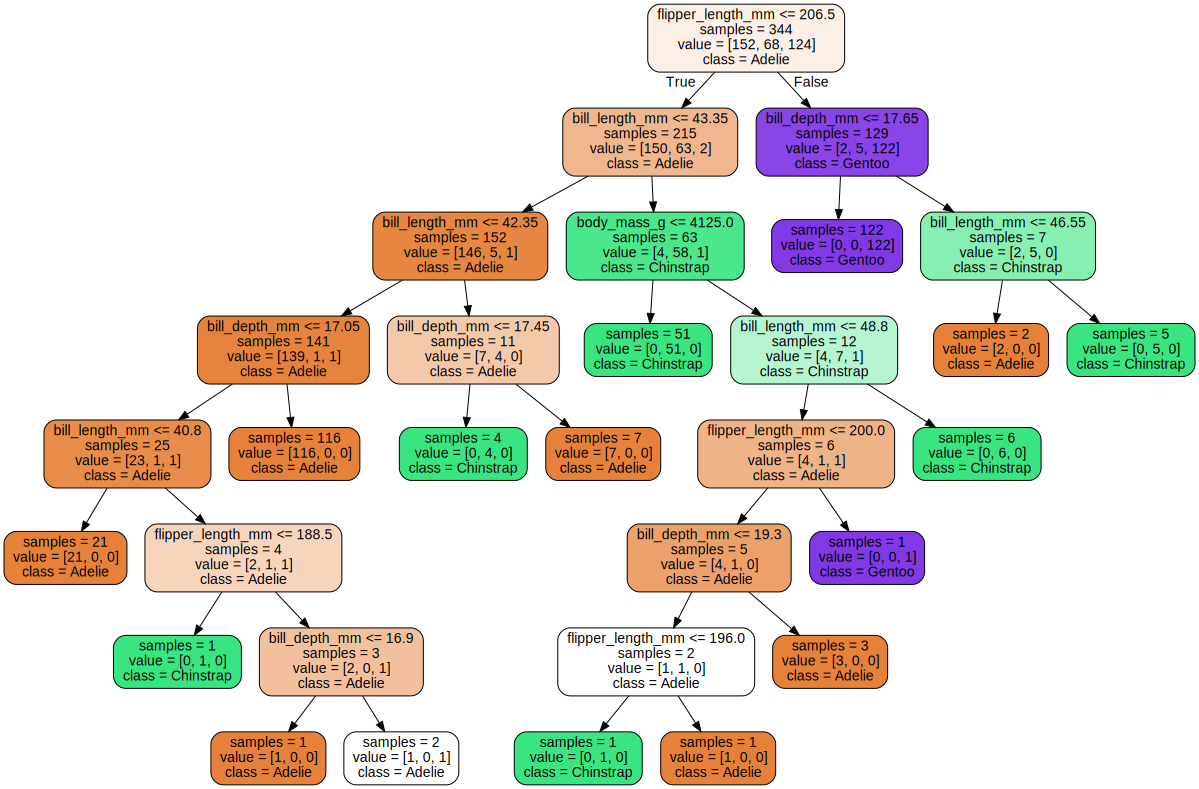

In [58]:
export_graphviz(model, out_file='penguins_df.dot', feature_names=feature, class_names=target,impurity=False, filled=True, rounded=True)
Source.from_file('penguins_df.dot')

In [59]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

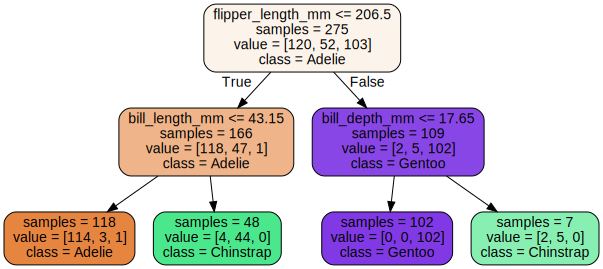

In [66]:
model_training = DecisionTreeClassifier(max_depth= 2,random_state=42)   #THỬ XEM GIÁ TRỊ CỦA MAX_DEPTH =2
model_training.fit(X_train,y_train)
export_graphviz(model_training,out_file="penguins_df.dot",feature_names=feature,class_names=target,impurity=False,filled=True,rounded=True)
Source.from_file("penguins_df.dot")

In [69]:
y_predicts = model_training.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score   #VỚI GIÁ TRỊ MAX_DEPTH=2 THÌ GIÁ TRỊ "ACCURACY = 0.942"
print("accuracy = ",accuracy_score(y_test,y_predicts))

accuracy =  0.9420289855072463


In [74]:
#THỬ MAX_DEPTH = 100
model_training1 = DecisionTreeClassifier(max_depth= 100,random_state= 42)
model_training1.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [78]:
y_predicts1 = model_training1.predict(X_test)  
print("accuracy = ",accuracy_score(y_test,y_predicts1))
#nhận thấy khi max_depth tăng thì training_score cũng tăng

accuracy =  0.9565217391304348


In [79]:
#khi max_depth =0.5
model_training2 = DecisionTreeClassifier(max_depth= 0.5,random_state= 42)
model_training2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=0.5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [80]:
y_predicts2 = model_training2.predict(X_test)  
print("accuracy = ",accuracy_score(y_test,y_predicts2))
#khi max_depth giảm mạnh thì training_score cũng giảm mạnh

accuracy =  0.463768115942029
